<a href="https://colab.research.google.com/github/PolinaBoeva/predictive_models_dota2/blob/main/Boeva/Dota2_EDA_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Описание колонок в датасете


• match_id - уникальный идентификатор матча \
• player_slot - слот игрока в команде \
• account_id - уникальный идентификатор игрока \
• hero_id - идентификатор героя \
• kills - количество убийств, совершенных игроком \
• hero_kills - количество убийств игроков, совершенных игроком \
• kills_per_min - количество убийств в минуту \
• kda -  соотношения между сумой убийств и ассистов на количество смертей \
• denies - количество убийств союзников \
• hero_healing - лечение союзных героев игроком \
• item_0 - item_5 - предметы, купленные командой \
• assists - помощь союзному герою в убийстве вражеского героя \
• deaths - количество смертей игрока \
• gold_per_min - общее количество золотых очков игрока в минуту \
• total_gold - общее количество золота за игру \
• hero_damage - общий урон героя вражеским героям \
• level - уровень игрока на конец игры \
• rune_pickups - количество подобранных рун \
• xp_per_min - количество опыта в минуту \
• total_xp - всего опыта \
• pings - задержка в миллисекундах между вашим действием и реакцией героя в игре \
• net_worth - общая ценность персонажа (количество кэша и инвентарь) \
• teamfight_participation - участие в командных боях \
• camps_stacked - количество stacked лагерей \
• creeps_stacked - количество stacked крипов из их лагеря \
• roshan_kills - общее количество убийств рошана, совершенных игроком \
• stuns - количество использованных оглушений \
• tower_kills - количество уничтоженных башен \
• courier_kills - количество убитых курьеров игроком \
• observer_kills - количество уничтоженных Observer Ward \
• sentry_uses - количество использований Sentry Ward (возможность видеть невидимое \
• game_mode - набор ограничений, в рамках которых можно играть \
• actions_per_min -  количество действий игрока за минуту \
• rank_tier - ранг игрока \
• aghanims_scepter - наличие Scepter (0, 1, Nan) \
• moonshard - наличие moonshard (0, 1, Nan) \
• isRadiant - флаг укзалатель команды \
• win - флаг указатель победы \
• radiant_win
• match_id - уникальный идентификатор матча \
• duration - длительность матча в секундах \
• first_blood_time - время первого убийства в секундах \
• start_date_time - дата и время начала матча \
• throw - максимальное преимущество команды игрока в золоте в случае проигрыша матча \
• loss - максимальное отставание в золоте команды игрока в случае проигрыша матча \
• comeback - максимальное отставание по золоту у команды игрока, если она выиграла матч

# EDA

In [ ]:
# Импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dota2.csv')

<ipython-input-72-511cfa15491d>:1: DtypeWarning: Columns (42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dota2.csv')


In [ ]:
# размер датасета
df.shape

(246515, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246515 entries, 0 to 246514
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   match_id                 246515 non-null  int64  
 1   player_slot              246515 non-null  int64  
 2   account_id               246489 non-null  float64
 3   hero_name                246515 non-null  object 
 4   kills                    246515 non-null  float64
 5   hero_kills               246146 non-null  float64
 6   courier_kills            246146 non-null  float64
 7   observer_kills           246146 non-null  float64
 8   kills_per_min            231474 non-null  float64
 9   kda                      246515 non-null  float64
 10  denies                   246515 non-null  float64
 11  hero_healing             246515 non-null  float64
 12  item_0                   246515 non-null  object 
 13  item_1                   246515 non-null  object 
 14  item

## Работа с пропусками

In [ ]:
# вывод пропусков
pd.set_option('display.max_rows', None)
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

account_id                     26
hero_kills                    369
courier_kills                 369
observer_kills                369
kills_per_min               15041
rune_pickups                  369
total_xp                      771
actions_per_min               369
pings                       29964
teamfight_participation       369
camps_stacked                 369
creeps_stacked                369
stuns                         369
sentry_uses                   369
roshan_kills                  369
tower_kills                   369
rank_tier                   91195
aghanims_scepter               26
moonshard                      26
isRadiant                       7
win                             7
radiant_win                     7
throw                      120376
loss                       120376
comeback                   126556
dtype: int64


In [ ]:
# Пропуски в %
pd.set_option('display.max_rows', None)
missing_values = df.isna().mean() * 100
missing_values = missing_values[missing_values > 0]
print(missing_values)

account_id                  0.010547
hero_kills                  0.149687
courier_kills               0.149687
observer_kills              0.149687
kills_per_min               6.101454
rune_pickups                0.149687
total_xp                    0.312760
actions_per_min             0.149687
pings                      12.155041
teamfight_participation     0.149687
camps_stacked               0.149687
creeps_stacked              0.149687
stuns                       0.149687
sentry_uses                 0.149687
roshan_kills                0.149687
tower_kills                 0.149687
rank_tier                  36.993692
aghanims_scepter            0.010547
moonshard                   0.010547
isRadiant                   0.002840
win                         0.002840
radiant_win                 0.002840
throw                      48.831106
loss                       48.831106
comeback                   51.338052
dtype: float64


Есть 7 пропусков в переменной win, а также некоторые строки без account_id. Большое количество пропусков в переменных rank_tier, pings, throw, loss, comeback (пропуски в последниx 3 переменных составляют большую часть от выборки, поскольку есть другие признаки, отражающие накопление золота, удалим данные столбцы). 369 пропусков в некоторых переменных возможно связаны с неатакующим классом игрока. Большой % пропусков в переменной rank_tier вероятно связан с тем, что до этого игрок играл в нерейтинговых режимах. Проанализируем подробней.  

In [ ]:
col = ['pings', 'throw', 'loss', 'comeback', 'rank_tier']
df.drop(col, axis=1, inplace=True)

Вероятно аккаунты без account_id играли в анонимном режиме, для некоторых match_id
не все члены команды не имеют account_id (но большая чать игроков), поскольку в некоторых вся команда без account_id невозможен сбор исторических данных, необходимо удалить эти матчи из выборки.

In [ ]:
df[df['account_id'].isna()].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,aghanims_scepter,moonshard,isRadiant,win,radiant_win,start_date_time,duration,first_blood_time,primary_attr,attack_type
5669,7529291293,132,NaN,Bane,6.0,6.0,0.0,0.0,0.118304,3.33,...,NaN,NaN,False,0.0,True,2024-01-09 11:52:16,50.716667,3.65,all,Ranged
5670,7529291293,131,NaN,Dazzle,0.0,0.0,0.0,0.0,NaN,0.00,...,NaN,NaN,False,0.0,True,2024-01-09 11:52:16,50.716667,3.65,all,Ranged
5671,7529291293,129,NaN,Lion,0.0,0.0,0.0,0.0,NaN,0.00,...,NaN,NaN,False,0.0,True,2024-01-09 11:52:16,50.716667,3.65,int,Ranged
5673,7529291293,130,NaN,Phantom Assassin,5.0,5.0,0.0,0.0,0.098587,11.00,...,NaN,NaN,False,0.0,True,2024-01-09 11:52:16,50.716667,3.65,agi,Melee
5674,7529291293,3,NaN,Juggernaut,5.0,5.0,0.0,0.0,0.098587,9.00,...,NaN,NaN,True,1.0,True,2024-01-09 11:52:16,50.716667,3.65,agi,Melee


In [ ]:
invalid_match_ids = df[df['account_id'].isna()]['match_id'].unique()
df.drop(df[df['match_id'].isin(invalid_match_ids)].index, inplace=True)

In [ ]:
# в одном из матчей нет разделения на комнады, а также неизвестен исход матча,
#удалим его из выборки
df[df['win'].isna()].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,aghanims_scepter,moonshard,isRadiant,win,radiant_win,start_date_time,duration,first_blood_time,primary_attr,attack_type
7901,7531639368,129,94004717.0,Ogre Magi,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,2024-01-10 23:54:09,50.3,0.0,str,Melee
7902,7531639368,132,107579895.0,Phantom Lancer,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,2024-01-10 23:54:09,50.3,0.0,agi,Melee
7903,7531639368,4,99796146.0,Keeper of the Light,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,2024-01-10 23:54:09,50.3,0.0,int,Ranged
7904,7531639368,131,85312703.0,Venomancer,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,2024-01-10 23:54:09,50.3,0.0,all,Ranged
7905,7531639368,2,138535219.0,Necrophos,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,2024-01-10 23:54:09,50.3,0.0,int,Ranged


In [ ]:
df.drop(df[df['match_id'] == 7531639368].index, inplace=True)

In [ ]:
# Рассмотрим пропуски в переменных, отражающих игровую статистику
df[df['courier_kills'].isna()].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,aghanims_scepter,moonshard,isRadiant,win,radiant_win,start_date_time,duration,first_blood_time,primary_attr,attack_type
13991,7540598399,132,2.610144e+08,Treant Protector,1.0,NaN,NaN,NaN,0.031612,0.86,...,0.0,0.0,False,0.0,True,2024-01-16 16:55:52,31.633333,2.116667,str,Melee
13992,7540598399,131,1.482969e+09,Grimstroke,0.0,NaN,NaN,NaN,NaN,2.00,...,0.0,0.0,False,0.0,True,2024-01-16 16:55:52,31.633333,2.116667,int,Ranged
13993,7540598399,129,1.245805e+09,Slardar,1.0,NaN,NaN,NaN,0.031612,0.50,...,0.0,0.0,False,0.0,True,2024-01-16 16:55:52,31.633333,2.116667,str,Melee
13994,7540598399,128,1.760019e+08,Windranger,8.0,NaN,NaN,NaN,0.252898,1.63,...,0.0,0.0,False,0.0,True,2024-01-16 16:55:52,31.633333,2.116667,all,Ranged
13995,7540598399,130,1.281508e+09,Sniper,6.0,NaN,NaN,NaN,0.189673,1.63,...,0.0,0.0,False,0.0,True,2024-01-16 16:55:52,31.633333,2.116667,agi,Ranged


В строках, где показатели действий в матче Nan можно заметить много строк с kills = 0,
в иных случаях вероятно игроком не было использовано hero_kills, courier_kills,
observer_kills, rune_pickups, teamfight_participation, camps_stacked, creeps_stacked, stuns, sentry_uses, roshan_kills, tower_kills заменим эти пропуски на 0, также заменим на 0 Nan kills_per_min, где kills = 0.

In [ ]:
df[['hero_kills', 'courier_kills', 'observer_kills', 'rune_pickups', 'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses', 'roshan_kills', 'tower_kills']] = df[['hero_kills', 'courier_kills', 'observer_kills', 'rune_pickups', 'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses', 'roshan_kills', 'tower_kills']].fillna(0)

In [ ]:
df['kills_per_min'] = df.apply(lambda row: 0 if pd.isna(row['kills_per_min'])
and row['kills'] == 0 else row['kills_per_min'], axis=1)

In [ ]:
df['kills_per_min'].isna().sum()

0

In [ ]:
# вывод пропусков
pd.set_option('display.max_rows', None)
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

total_xp           760
actions_per_min    369
dtype: int64


Рассмотрим подробнее пропуски в переменной actions_per_min, а также 0 значения переменной

In [ ]:
df[df['actions_per_min'] == 0].head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,aghanims_scepter,moonshard,isRadiant,win,radiant_win,start_date_time,duration,first_blood_time,primary_attr,attack_type
1670,7520884408,132,1.001025e+09,Pudge,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,1.0,False,2024-01-04 11:01:11,47.483333,0.0,str,Melee
1671,7520884408,0,4.123204e+08,Earthshaker,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,False,2024-01-04 11:01:11,47.483333,0.0,str,Melee
1672,7520884408,1,1.598219e+09,Ancient Apparition,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,False,2024-01-04 11:01:11,47.483333,0.0,int,Ranged
1673,7520884408,2,1.291450e+09,Juggernaut,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,False,2024-01-04 11:01:11,47.483333,0.0,agi,Melee
1674,7520884408,3,1.555070e+09,Omniknight,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,False,2024-01-04 11:01:11,47.483333,0.0,str,Melee


Можно заметить, что в большинстве при отсутствии значения actions_per_min отсутствует любая информация о матче в целом, удалим информацию о тех матчах, где хотя бы у двух человек в команде нет информации о действиях

In [ ]:
# Использовала gpt
df['actions_per_min'] = pd.to_numeric(df['actions_per_min'], errors='coerce')

# Создадим маски для игроков с actions_per_min = 0 или NaN
mask_invalid = df['actions_per_min'].isna() | (df['actions_per_min'] == 0)

# Разделим на команды Radiant (slot 0-4) и Dire (slot 128-132)
radiant_players = df[df['player_slot'] < 5]
dire_players = df[df['player_slot'] >= 128]

# Для каждой команды проверим, сколько игроков имеют invalid actions_per_min
invalid_radiant_counts = radiant_players.groupby('match_id')['actions_per_min'].apply(lambda x: (mask_invalid[x.index]).sum())
invalid_dire_counts = dire_players.groupby('match_id')['actions_per_min'].apply(lambda x: (mask_invalid.loc[x.index]).sum())

# Получим match_id, где в Radiant или Dire больше или равно 2 игроков с actions_per_min = 0 или NaN
invalid_match_ids_radiant = invalid_radiant_counts[invalid_radiant_counts >= 2].index
invalid_match_ids_dire = invalid_dire_counts[invalid_dire_counts >= 2].index

# Объединим все такие match_id
invalid_match_ids = invalid_match_ids_radiant.union(invalid_match_ids_dire)

# Удалим из DataFrame все строки с этими match_id
df = df[~df['match_id'].isin(invalid_match_ids)]


In [ ]:
df['game_mode'].value_counts()

,count
game_mode,
2,241311
1,1825
22,1284
16,450
21,100
4,20


Game mode оказывает большое влияние на выбор персонажей и ход игры, поскольку большая часть данных про лиги играются в game_mode_captains_mode для стабильного обучения оставим только его

In [ ]:
df = df[df['game_mode'] == 2]

In [ ]:
df.shape

(241311, 48)

## Описательные статистики, визуализация

In [ ]:
# Описательные статистики по числовым переменным
df.describe()

,match_id,player_slot,account_id,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,denies,...,stuns,sentry_uses,roshan_kills,tower_kills,game_mode,aghanims_scepter,moonshard,win,duration,first_blood_time
count,2.413110e+05,241311.000000,2.413110e+05,241311.000000,241311.000000,241311.000000,241311.000000,241311.000000,241311.000000,241311.000000,...,241311.000000,241311.000000,241311.000000,241311.000000,241311.0,241311.000000,241311.000000,241311.000000,241311.000000,241311.000000
mean,7.761090e+09,65.998628,6.965515e+08,5.675485,5.661242,0.230416,0.862016,0.178057,3.888219,5.727870,...,30.459974,2.146496,0.125241,0.924139,2.0,0.019721,0.003009,0.499998,33.063228,2.046281
std,1.476024e+08,64.015785,5.937918e+08,4.453572,4.459743,0.573764,1.287876,0.145178,4.265202,5.881401,...,32.762167,3.494147,0.389116,1.436330,0.0,0.139042,0.054768,0.500001,9.580999,1.933230
min,7.515635e+09,0.000000,4.244300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-83.226830,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,5.883333,0.000000
25%,7.636195e+09,2.000000,1.693600e+08,2.000000,2.000000,0.000000,0.000000,0.073200,1.330000,1.000000,...,5.655908,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,26.716667,0.250000
50%,7.763793e+09,4.000000,3.711266e+08,5.000000,5.000000,0.000000,0.000000,0.143541,2.500000,4.000000,...,22.865280,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,31.483333,1.766667
75%,7.888581e+09,130.000000,1.216609e+09,8.000000,8.000000,0.000000,1.000000,0.246070,4.750000,8.000000,...,44.200716,3.000000,0.000000,1.000000,2.0,0.000000,0.000000,1.000000,37.866667,3.083333
max,8.013424e+09,132.000000,1.837860e+09,48.000000,48.000000,22.000000,18.000000,1.733333,58.000000,82.000000,...,702.498050,42.000000,7.000000,11.000000,2.0,1.000000,1.000000,1.000000,109.866667,16.183333


In [ ]:
# Описательные статистики категориальных переменных
df.describe(include='object')

,hero_name,item_0,item_1,item_2,item_3,item_4,item_5,isRadiant,radiant_win,start_date_time,primary_attr,attack_type
count,241311,241311,241311,241311,241311,241311,241311,241311,241311,241311,241311,241311
unique,124,203,204,204,205,205,214,2,2,24098,4,2
top,Rubick,power_treads,magic_wand,magic_wand,magic_wand,magic_wand,ability_base,True,True,2024-07-14 12:30:00,str,Ranged
freq,6808,19539,19737,23112,17681,18315,23740,120658,123472,30,67926,131640


In [ ]:
# Средние значение по всему датасету по выборочным показателям матчей
df[['kills', 'kills_per_min', 'kda', 'denies', 'hero_healing', 'assists',
'deaths', 'gold_per_min', 'xp_per_min', 'actions_per_min',
'duration', 'first_blood_time']].mean()

,0
kills,5.675485
kills_per_min,0.178057
kda,3.888219
denies,5.727870
hero_healing,853.487255
assists,11.729258
deaths,5.782041
gold_per_min,487.058161
xp_per_min,624.679215
actions_per_min,277.034445


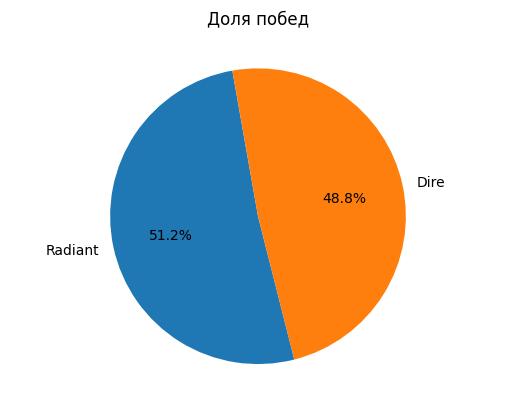

In [ ]:
# Доля побед по командам
X = [df['win'][(df['isRadiant']==True)].sum(), df['win'][(df['isRadiant']==False)].sum()]
Y = ['Radiant','Dire']

plt.title('Доля побед')
plt.axis('equal')
plt.pie(X, labels=Y, startangle=100, autopct='%.1f%%')
plt.show()

In [ ]:
# Рассчитаем топ 20 популярных героев
hero_count = df.groupby(['hero_name'], as_index=False)['account_id'].count().sort_values(by=['account_id'], ascending=False).head(20)
hero_count

,hero_name,account_id
84,Rubick,6808
105,Tiny,5192
53,Luna,4980
19,Crystal Maiden,4655
119,Windranger,4560
112,Vengeful Spirit,4547
38,Hoodwink,4348
27,Dragon Knight,4275
14,Centaur Warrunner,4145
79,Pudge,3939


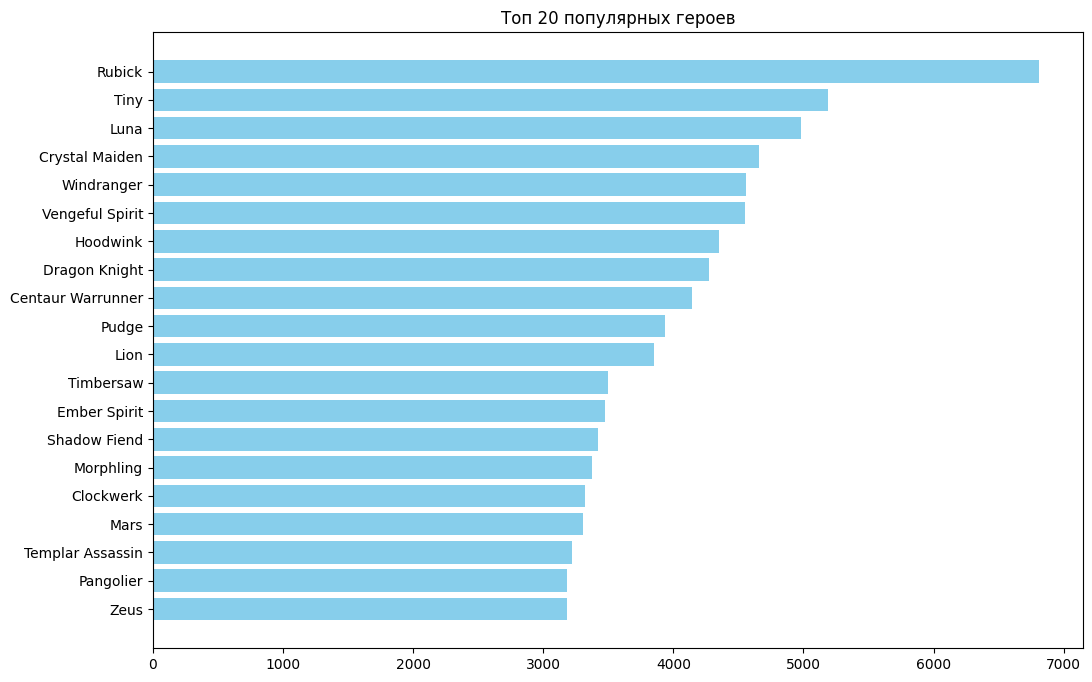

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(hero_count['hero_name'], hero_count['account_id'], color='skyblue')
plt.title('Топ 20 популярных героев')
plt.gca().invert_yaxis()  # Инвертировать ось Y для правильного отображения
plt.show()

In [ ]:
# Рассмотрим популярные items
melted_df = df.melt(value_vars=['item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5'], value_name='item')
melted_df = melted_df.dropna()
items_count = melted_df['item'].value_counts()
top_20_items = items_count.head(20)
top_20_items

,count
item,
magic_wand,110553
blink,77940
ability_base,75853
power_treads,70215
arcane_boots,61198
black_king_bar,54626
bracer,54267
ultimate_scepter,44071
phase_boots,40373


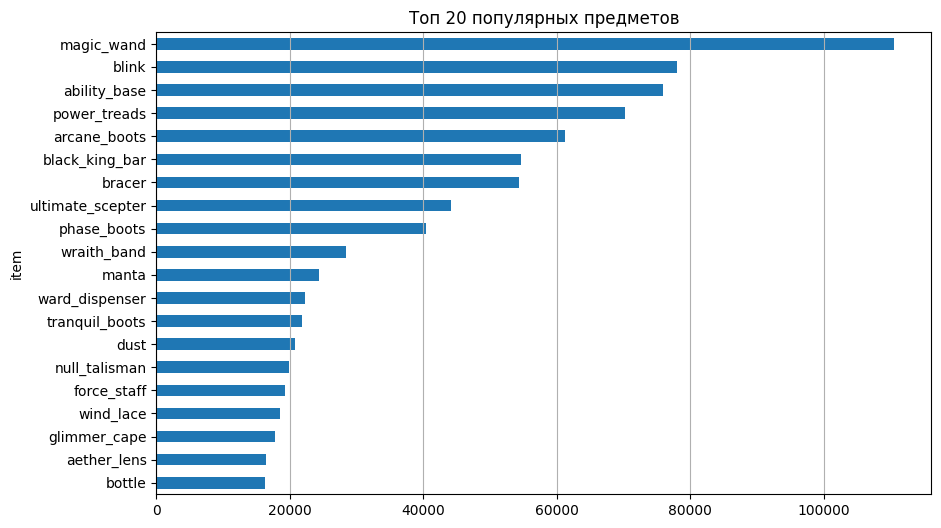

In [ ]:
plt.figure(figsize=(10, 6))
top_20_items.plot(kind='barh')
plt.title('Топ 20 популярных предметов')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [ ]:
# Рассмотрим статистику по героям (вывела топ 20 с наибольшим winrate)
columns = ['hero_name', 'win', 'kills', 'hero_kills', 'courier_kills', 'observer_kills',
'kills_per_min', 'kda', 'denies', 'hero_healing', 'assists', 'deaths',
'gold_per_min', 'xp_per_min', 'rune_pickups', 'actions_per_min', 'net_worth',
'teamfight_participation','camps_stacked', 'creeps_stacked', 'stuns',
'duration', 'first_blood_time', 'sentry_uses', 'roshan_kills',
'tower_kills']
heroes_stats = df[columns].groupby(['hero_name']).mean()
heroes_stats.sort_values(by=['win'], ascending=False).head(20)

,win,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,denies,hero_healing,assists,...,net_worth,teamfight_participation,camps_stacked,creeps_stacked,stuns,duration,first_blood_time,sentry_uses,roshan_kills,tower_kills
hero_name,,,,,,,,,,,,,,,,,,,,,
Chen,0.633370,2.276619,2.248079,0.211855,1.574094,0.080383,4.851559,3.870472,8502.298573,14.829857,...,11473.094402,0.625891,2.801317,7.635565,4.911672,32.383626,1.804830,6.003293,0.119649,1.127333
Broodmother,0.547988,7.539732,7.543860,0.315789,0.591331,0.258152,4.821527,8.827657,168.198142,9.657379,...,18291.439628,0.605391,0.513932,1.107327,1.367966,31.286980,1.888459,0.397317,0.246646,2.545924
Enigma,0.547201,3.865497,3.852130,0.192982,0.657477,0.121108,3.744060,10.238095,1901.274854,13.914787,...,14948.082707,0.611258,1.583960,4.328321,30.450345,34.796241,1.923253,1.516291,0.098580,1.369256
Bane,0.538002,3.324509,3.320239,0.251067,1.853971,0.109142,2.877045,3.217763,95.908625,14.957301,...,8742.504697,0.592260,1.880444,6.179334,79.480180,32.806035,2.029462,5.961571,0.018787,0.158839
Brewmaster,0.534884,5.123326,5.128259,0.194503,0.415081,0.150502,5.202403,10.426357,456.951374,12.563073,...,17955.782946,0.624315,1.283298,3.168428,39.695002,35.935083,1.645513,0.164200,0.152925,1.359408
Nature's Prophet,0.534837,5.992481,5.963910,0.326817,0.991479,0.193939,3.765569,4.865163,304.231078,14.409023,...,15313.612030,0.674913,2.064662,6.028571,16.939552,32.436408,1.726558,2.767920,0.110276,1.340351
Leshrac,0.534598,7.377242,7.361353,0.152742,0.652486,0.233875,3.861297,5.329062,218.166069,10.369042,...,17790.186058,0.619709,2.160943,6.984111,27.649556,33.213625,2.008295,1.165556,0.186571,1.742183
Omniknight,0.534597,4.473934,4.478673,0.213270,1.150711,0.143980,3.465848,6.024645,4149.018957,10.579147,...,11522.761137,0.507723,0.776303,2.381043,0.126386,32.627773,2.001864,3.694787,0.085308,0.470142
Bounty Hunter,0.534161,6.161491,6.154037,0.824845,0.967702,0.202172,3.517739,3.213665,369.032298,14.481988,...,14829.927950,0.619636,0.388820,1.118012,13.166504,31.555300,1.795342,2.362733,0.027329,0.305590


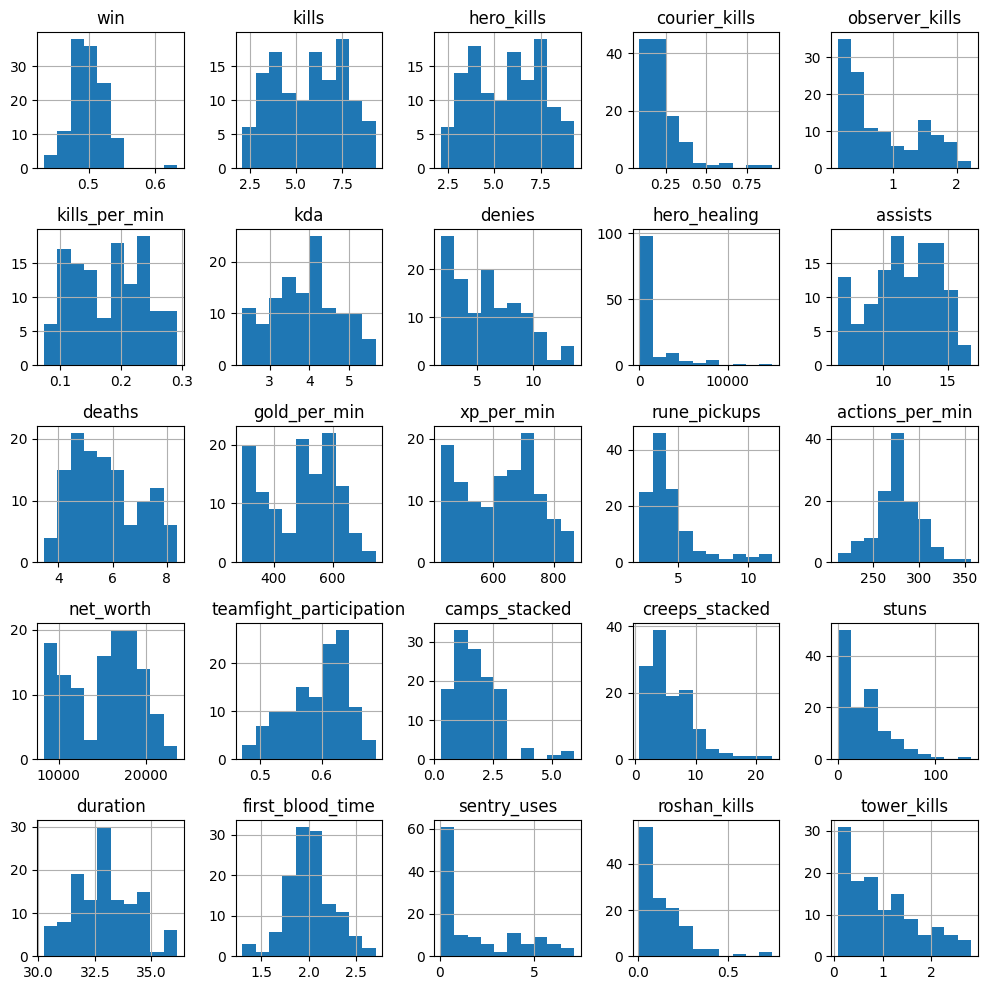

In [ ]:
heroes_stats.hist(figsize= (10,10))
plt.tight_layout()

## Корреляции

In [ ]:
# (изначальные данные по players, match) только числовых столбцов
columns = ['win', 'kills', 'kda', 'assists', 'deaths', 'gold_per_min', 'xp_per_min',
'actions_per_min', 'teamfight_participation', 'duration', 'first_blood_time']

<Axes: >

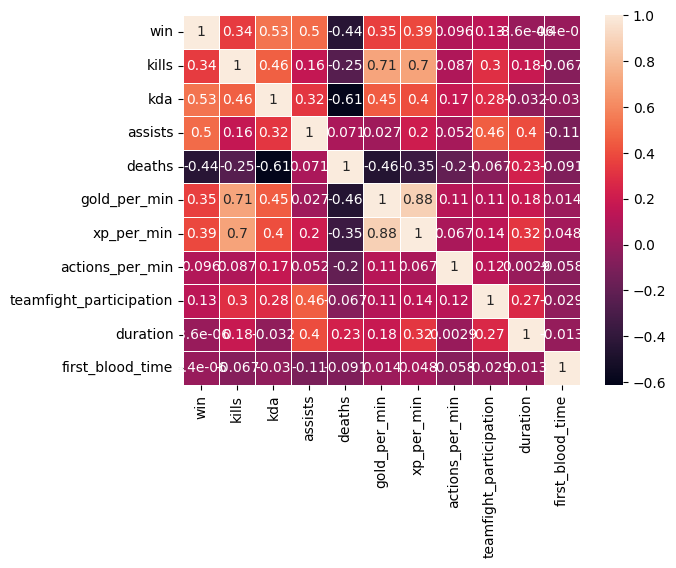

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

Можно наблюдать взаимосвязь между показателем win и игровыми показателями: kills, kda, assiats, deaths, gokd_per_min, xp_per_min. также взаимосвзя есть между признаками: kills и gold_per_min, kills и xp_per_min, gold_per_min и xp_per_min.

## Агрегированная информация по действиям игрока за предыдущие матчи

Поскольку предсказания будут строиться на момент начала матча, необходимо рассмотреть показателями, рассчитанными за предыдущие игры.

In [ ]:
df = df.sort_values(by=['start_date_time'])

In [ ]:
def calculate_expanding_average(df, group_col, target_cols):
    for col in target_cols:
        df[f'previous_{col}_avr'] = df.groupby(group_col)[col].transform(lambda x: x.shift().expanding().mean())
    return df

In [ ]:
df_players_agg = calculate_expanding_average(df, 'account_id', ['kills', 'hero_kills', 'courier_kills',
'observer_kills', 'kills_per_min', 'kda', 'denies', 'hero_healing', 'assists',
'hero_damage', 'deaths', 'gold_per_min', 'total_gold', 'gold_spent', 'level',
'rune_pickups', 'xp_per_min', 'total_xp', 'actions_per_min', 'net_worth',
'teamfight_participation', 'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses',
'roshan_kills', 'tower_kills', 'win', 'duration', 'first_blood_time'])

In [ ]:
df_players_agg.head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,previous_teamfight_participation_avr,previous_camps_stacked_avr,previous_creeps_stacked_avr,previous_stuns_avr,previous_sentry_uses_avr,previous_roshan_kills_avr,previous_tower_kills_avr,previous_win_avr,previous_duration_avr,previous_first_blood_time_avr
0,7515635423,0,177062248.0,Earth Spirit,8.0,8.0,0.0,0.0,0.249221,3.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7515635423,1,164322994.0,Morphling,11.0,11.0,0.0,0.0,0.342679,4.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7515635423,2,294245092.0,Shadow Demon,7.0,5.0,0.0,1.0,0.218069,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7515635423,3,154357932.0,Treant Protector,11.0,11.0,0.0,4.0,0.342679,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7515635423,4,279486190.0,Shadow Fiend,5.0,5.0,0.0,0.0,0.155763,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_players_agg.columns

Index(['match_id', 'player_slot', 'account_id', 'hero_name', 'kills',
       'hero_kills', 'courier_kills', 'observer_kills', 'kills_per_min', 'kda',
       'denies', 'hero_healing', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'assists', 'hero_damage', 'deaths', 'gold_per_min',
       'total_gold', 'gold_spent', 'level', 'rune_pickups', 'xp_per_min',
       'total_xp', 'actions_per_min', 'net_worth', 'teamfight_participation',
       'camps_stacked', 'creeps_stacked', 'stuns', 'sentry_uses',
       'roshan_kills', 'tower_kills', 'game_mode', 'aghanims_scepter',
       'moonshard', 'isRadiant', 'win', 'radiant_win', 'start_date_time',
       'duration', 'first_blood_time', 'primary_attr', 'attack_type',
       'previous_kills_avr', 'previous_hero_kills_avr',
       'previous_courier_kills_avr', 'previous_observer_kills_avr',
       'previous_kills_per_min_avr', 'previous_kda_avr', 'previous_denies_avr',
       'previous_hero_healing_avr', 'previous_assists_avr',
 

## Агрегированная информация по командам (radiant, dire) за предыдущие матчи
средние, максимальные и минимальные показатели по игрокам в команде за предыдущие матчи

In [ ]:
# team_1 - Radiant target - radiant_win
def aggregate_team_stats(team_df, team_name, columns_to_aggregate, stats=['mean', 'max', 'min']):


    # Создаем словарь для агрегации, где ключи - это названия колонок, а значения - список статистик
    aggregation_dict = {col: stats for col in columns_to_aggregate}

    # Группируем и агрегируем данные по match_id
    aggregated = team_df.groupby('match_id').agg(aggregation_dict)

    # Создаем новые колонки с соответствующими статистиками, но не переименовываем оригинальные колонки
    new_columns = []
    for col in aggregated.columns:
        col_name, stat = col
        # Добавляем новые колонки в итоговый DataFrame с префиксом для команды
        new_columns.append(f'{col_name}_{team_name}_{stat}')

    # Обновляем колонки с новыми именами
    aggregated.columns = new_columns

    return aggregated

columns_to_aggregate = ['previous_kills_avr', 'previous_hero_kills_avr',
       'previous_courier_kills_avr', 'previous_observer_kills_avr',
       'previous_kills_per_min_avr', 'previous_kda_avr', 'previous_denies_avr',
       'previous_hero_healing_avr', 'previous_assists_avr',
       'previous_hero_damage_avr', 'previous_deaths_avr',
       'previous_gold_per_min_avr', 'previous_total_gold_avr',
       'previous_gold_spent_avr', 'previous_level_avr',
       'previous_rune_pickups_avr', 'previous_xp_per_min_avr',
       'previous_total_xp_avr', 'previous_actions_per_min_avr',
       'previous_net_worth_avr', 'previous_teamfight_participation_avr',
       'previous_camps_stacked_avr', 'previous_creeps_stacked_avr',
       'previous_stuns_avr', 'previous_sentry_uses_avr',
       'previous_roshan_kills_avr', 'previous_tower_kills_avr',
       'previous_win_avr', 'previous_duration_avr',
       'previous_first_blood_time_avr']

# Разделяем данные на команды Radiant и Dire
radiant_df = df_players_agg[df_players_agg['isRadiant'] == 1]
dire_df = df_players_agg[df_players_agg['isRadiant'] == 0]

# Агрегируем статистику для каждой команды
radiant_stats = aggregate_team_stats(radiant_df, 'team_1', columns_to_aggregate)
dire_stats = aggregate_team_stats(dire_df, 'team_2', columns_to_aggregate)

# Объединяем результаты по match_id
df_team = pd.merge(radiant_stats, dire_stats, on='match_id')

In [ ]:
df_team.head()

,previous_kills_avr_team_1_mean,previous_kills_avr_team_1_max,previous_kills_avr_team_1_min,previous_hero_kills_avr_team_1_mean,previous_hero_kills_avr_team_1_max,previous_hero_kills_avr_team_1_min,previous_courier_kills_avr_team_1_mean,previous_courier_kills_avr_team_1_max,previous_courier_kills_avr_team_1_min,previous_observer_kills_avr_team_1_mean,...,previous_tower_kills_avr_team_2_min,previous_win_avr_team_2_mean,previous_win_avr_team_2_max,previous_win_avr_team_2_min,previous_duration_avr_team_2_mean,previous_duration_avr_team_2_max,previous_duration_avr_team_2_min,previous_first_blood_time_avr_team_2_mean,previous_first_blood_time_avr_team_2_max,previous_first_blood_time_avr_team_2_min
match_id,,,,,,,,,,,,,,,,,,,,,
7515635423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7515660161,5.2,8.0,0.0,5.2,8.0,0.0,1.0,2.0,0.0,0.4,...,0.0,1.0,1.0,1.0,32.1,32.1,32.1,2.333333,2.333333,2.333333
7515737711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7515745579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7515769503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
radiant_win = df_players_agg[['radiant_win', 'match_id']].groupby('match_id').mean().reset_index()

In [ ]:
df_team = df_team.merge(radiant_win, on='match_id')
df_team.head()

,match_id,previous_kills_avr_team_1_mean,previous_kills_avr_team_1_max,previous_kills_avr_team_1_min,previous_hero_kills_avr_team_1_mean,previous_hero_kills_avr_team_1_max,previous_hero_kills_avr_team_1_min,previous_courier_kills_avr_team_1_mean,previous_courier_kills_avr_team_1_max,previous_courier_kills_avr_team_1_min,...,previous_win_avr_team_2_mean,previous_win_avr_team_2_max,previous_win_avr_team_2_min,previous_duration_avr_team_2_mean,previous_duration_avr_team_2_max,previous_duration_avr_team_2_min,previous_first_blood_time_avr_team_2_mean,previous_first_blood_time_avr_team_2_max,previous_first_blood_time_avr_team_2_min,radiant_win
0,7515635423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,7515660161,5.2,8.0,0.0,5.2,8.0,0.0,1.0,2.0,0.0,...,1.0,1.0,1.0,32.1,32.1,32.1,2.333333,2.333333,2.333333,0.0
2,7515737711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,7515745579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,7515769503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df_team.shape

(24131, 182)

# Проведем анализ получившихся столбцов

Рассмотрим корреялции новых столбцов

In [ ]:
# (данные расчитанные по предыдущим матчам) только числовых столбцов
columns = ['win', 'previous_kills_avr', 'previous_kda_avr', 'previous_assists_avr',
'previous_deaths_avr', 'previous_gold_per_min_avr', 'previous_xp_per_min_avr',
'previous_actions_per_min_avr', 'previous_teamfight_participation_avr',
'previous_duration_avr', 'previous_first_blood_time_avr']

<Axes: >

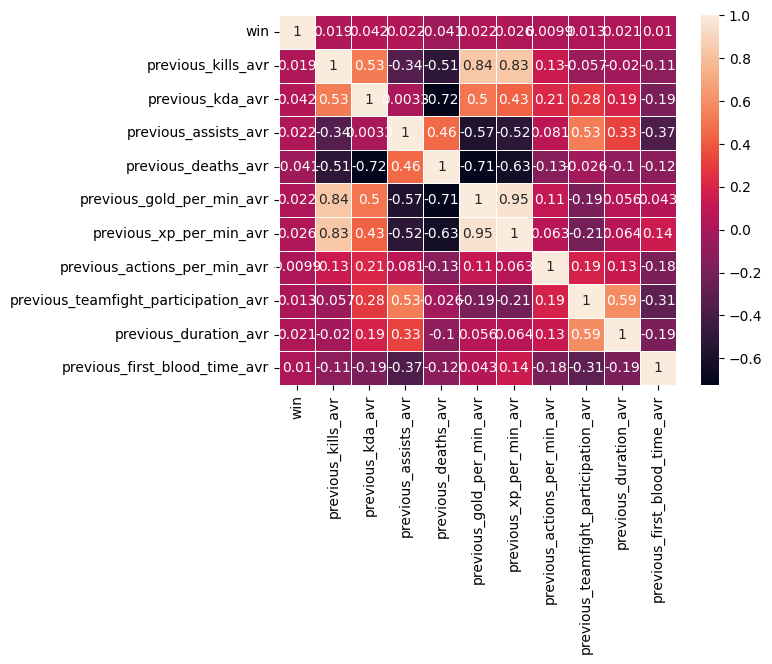

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df_players_agg[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

Корреляция с переменной win заметно уменьшилась при учете только данных за предыдущие матчи, при этом зависимость между переменными, усилилась взаимосвязь участия в командных сражениях с другими переменными.

In [ ]:
df_team.columns

Index(['match_id', 'previous_kills_avr_team_1_mean',
       'previous_kills_avr_team_1_max', 'previous_kills_avr_team_1_min',
       'previous_hero_kills_avr_team_1_mean',
       'previous_hero_kills_avr_team_1_max',
       'previous_hero_kills_avr_team_1_min',
       'previous_courier_kills_avr_team_1_mean',
       'previous_courier_kills_avr_team_1_max',
       'previous_courier_kills_avr_team_1_min',
       ...
       'previous_win_avr_team_2_mean', 'previous_win_avr_team_2_max',
       'previous_win_avr_team_2_min', 'previous_duration_avr_team_2_mean',
       'previous_duration_avr_team_2_max', 'previous_duration_avr_team_2_min',
       'previous_first_blood_time_avr_team_2_mean',
       'previous_first_blood_time_avr_team_2_max',
       'previous_first_blood_time_avr_team_2_min', 'radiant_win'],
      dtype='object', length=182)

In [ ]:
# данные расчитанные по предыдущим матчам и агрегированные по командам (средние значения)
columns = [
'radiant_win', 'previous_kills_avr_team_1_mean', 'previous_kda_avr_team_1_mean', 'previous_assists_avr_team_1_mean',
'previous_deaths_avr_team_1_mean', 'previous_gold_per_min_avr_team_1_mean', 'previous_xp_per_min_avr_team_1_mean',
'previous_actions_per_min_avr_team_1_mean', 'previous_teamfight_participation_avr_team_1_mean',
'previous_duration_avr_team_1_mean', 'previous_first_blood_time_avr_team_1_mean',
'previous_kills_avr_team_2_mean', 'previous_kda_avr_team_2_mean', 'previous_assists_avr_team_2_mean',
'previous_deaths_avr_team_2_mean', 'previous_gold_per_min_avr_team_2_mean', 'previous_xp_per_min_avr_team_2_mean',
'previous_actions_per_min_avr_team_2_mean', 'previous_teamfight_participation_avr_team_2_mean',
'previous_duration_avr_team_2_mean', 'previous_first_blood_time_avr_team_2_mean']

In [ ]:
df_team['radiant_win'] = df_team['radiant_win'].astype(int)

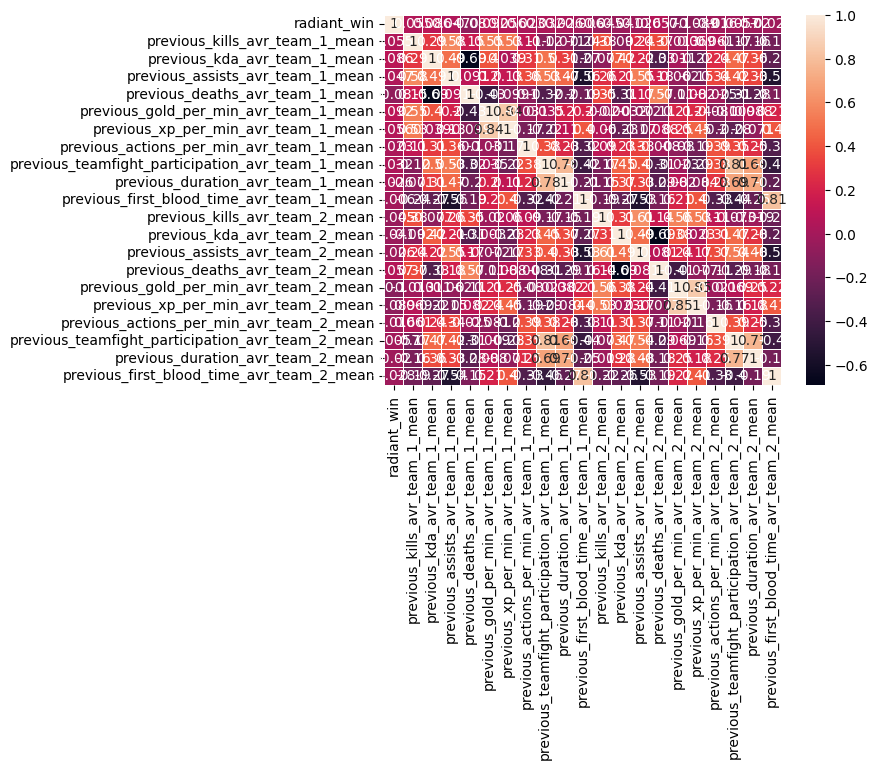

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df_team[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
corr_matrix = df_team[columns].corr()
corr_matrix

,radiant_win,previous_kills_avr_team_1_mean,previous_kda_avr_team_1_mean,previous_assists_avr_team_1_mean,previous_deaths_avr_team_1_mean,previous_gold_per_min_avr_team_1_mean,previous_xp_per_min_avr_team_1_mean,previous_actions_per_min_avr_team_1_mean,previous_teamfight_participation_avr_team_1_mean,previous_duration_avr_team_1_mean,...,previous_kills_avr_team_2_mean,previous_kda_avr_team_2_mean,previous_assists_avr_team_2_mean,previous_deaths_avr_team_2_mean,previous_gold_per_min_avr_team_2_mean,previous_xp_per_min_avr_team_2_mean,previous_actions_per_min_avr_team_2_mean,previous_teamfight_participation_avr_team_2_mean,previous_duration_avr_team_2_mean,previous_first_blood_time_avr_team_2_mean
radiant_win,1.000000,0.055404,0.086195,0.047151,-0.080186,0.091795,0.056097,0.023021,0.031659,0.026457,...,-0.045445,-0.040949,-0.026035,0.056653,-0.104856,-0.089031,-0.015922,-0.005720,-0.019815,-0.028012
previous_kills_avr_team_1_mean,0.055404,1.000000,0.292842,0.580573,0.152093,0.548815,0.528927,0.109420,-0.121138,-0.070679,...,0.375984,-0.092022,0.243453,0.365139,-0.013402,0.069452,0.060800,-0.166894,-0.157610,-0.191146
previous_kda_avr_team_1_mean,0.086195,0.292842,1.000000,0.486838,-0.690173,0.397898,0.039041,0.305433,0.499793,0.313760,...,-0.077224,0.421951,0.224978,-0.328983,0.010730,-0.216971,0.240831,0.465740,0.362717,-0.274387
previous_assists_avr_team_1_mean,0.047151,0.580573,0.486838,1.000000,0.091165,0.198459,0.126033,0.361290,0.534124,0.467831,...,0.255102,0.214634,0.549916,0.178840,-0.061941,-0.154781,0.339653,0.418902,0.334902,-0.542415
previous_deaths_avr_team_1_mean,-0.080186,0.152093,-0.690173,0.091165,1.000000,-0.427608,-0.099358,-0.099560,-0.319507,-0.198225,...,0.349843,-0.313416,0.166411,0.567213,-0.112181,0.082284,-0.025333,-0.312033,-0.278717,-0.146782
previous_gold_per_min_avr_team_1_mean,0.091795,0.548815,0.397898,0.198459,-0.427608,1.000000,0.844968,-0.030700,0.034849,0.198775,...,-0.019960,-0.003231,-0.071666,-0.110794,0.213735,0.244995,-0.080931,-0.009009,0.087728,0.207320
previous_xp_per_min_avr_team_1_mean,0.056097,0.528927,0.039041,0.126033,-0.099358,0.844968,1.000000,-0.173542,-0.215340,0.106170,...,0.060198,-0.231742,-0.168152,0.088473,0.250794,0.451677,-0.203583,-0.279837,-0.071489,0.404475
previous_actions_per_min_avr_team_1_mean,0.023021,0.109420,0.305433,0.361290,-0.099560,-0.030700,-0.173542,1.000000,0.378511,0.232075,...,0.089540,0.229702,0.331784,-0.007981,-0.079782,-0.192995,0.390042,0.352657,0.247474,-0.330281
previous_teamfight_participation_avr_team_1_mean,0.031659,-0.121138,0.499793,0.534124,-0.319507,0.034849,-0.215340,0.378511,1.000000,0.781143,...,-0.165896,0.448552,0.402064,-0.312449,-0.022760,-0.288570,0.380986,0.814876,0.686751,-0.456059
previous_duration_avr_team_1_mean,0.026457,-0.070679,0.313760,0.467831,-0.198225,0.198775,0.106170,0.232075,0.781143,1.000000,...,-0.150298,0.365520,0.331885,-0.289981,0.082332,-0.083877,0.283574,0.694933,0.713606,-0.267315


In [ ]:
# данные расчитанные по предыдущим матчам и агрегированные по командам (max значения)
columns = [
'radiant_win', 'previous_kills_avr_team_1_max', 'previous_kda_avr_team_1_max', 'previous_assists_avr_team_1_max',
'previous_deaths_avr_team_1_max', 'previous_gold_per_min_avr_team_1_max', 'previous_xp_per_min_avr_team_1_max',
'previous_actions_per_min_avr_team_1_max', 'previous_teamfight_participation_avr_team_1_max',
'previous_duration_avr_team_1_max', 'previous_first_blood_time_avr_team_1_max',
'previous_kills_avr_team_2_max', 'previous_kda_avr_team_2_max', 'previous_assists_avr_team_2_max',
'previous_deaths_avr_team_2_max', 'previous_gold_per_min_avr_team_2_max', 'previous_xp_per_min_avr_team_2_max',
'previous_actions_per_min_avr_team_2_max', 'previous_teamfight_participation_avr_team_2_max',
'previous_duration_avr_team_2_max', 'previous_first_blood_time_avr_team_2_max']

<Axes: >

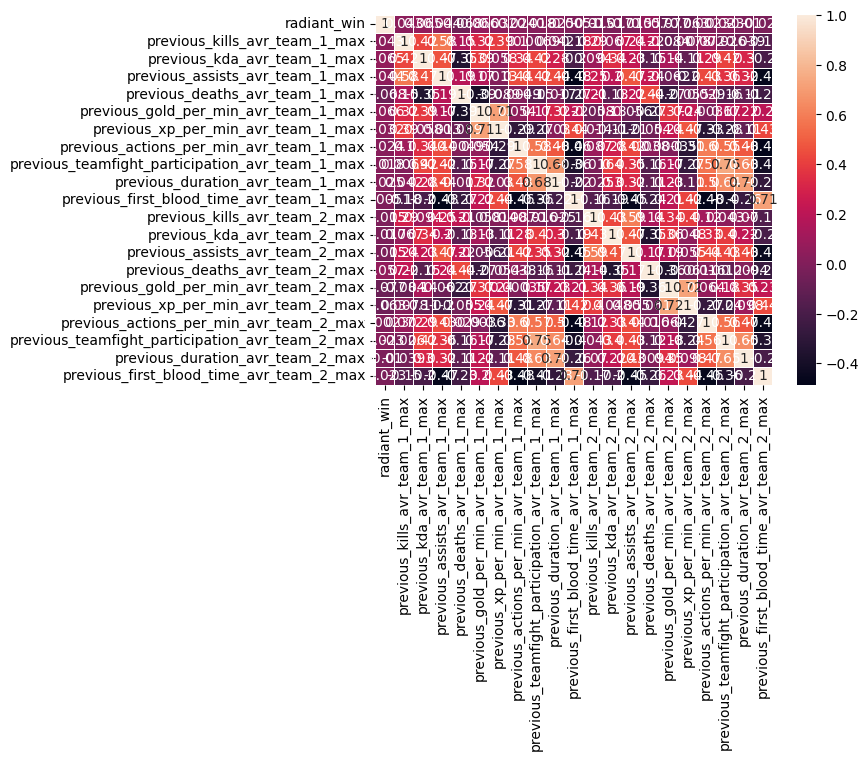

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df_team[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
corr_matrix = df_team[columns].corr()
corr_matrix

,radiant_win,previous_kills_avr_team_1_max,previous_kda_avr_team_1_max,previous_assists_avr_team_1_max,previous_deaths_avr_team_1_max,previous_gold_per_min_avr_team_1_max,previous_xp_per_min_avr_team_1_max,previous_actions_per_min_avr_team_1_max,previous_teamfight_participation_avr_team_1_max,previous_duration_avr_team_1_max,...,previous_kills_avr_team_2_max,previous_kda_avr_team_2_max,previous_assists_avr_team_2_max,previous_deaths_avr_team_2_max,previous_gold_per_min_avr_team_2_max,previous_xp_per_min_avr_team_2_max,previous_actions_per_min_avr_team_2_max,previous_teamfight_participation_avr_team_2_max,previous_duration_avr_team_2_max,previous_first_blood_time_avr_team_2_max
radiant_win,1.000000,0.042584,0.065474,0.043832,-0.067973,0.065953,0.031904,0.023690,0.017619,0.024798,...,-0.014623,-0.016802,-0.015212,0.056894,-0.077474,-0.062875,0.002255,0.022841,-0.010025,-0.023026
previous_kills_avr_team_1_max,0.042584,1.000000,0.420665,0.579251,0.150336,0.324898,0.391472,0.104415,0.006902,0.042244,...,0.290826,0.067345,0.243625,0.220153,-0.083698,0.007790,0.072126,-0.025810,-0.038617,-0.152092
previous_kda_avr_team_1_max,0.065474,0.420665,1.000000,0.465102,-0.353375,0.386353,0.058119,0.344601,0.420993,0.275215,...,0.093904,0.343984,0.225878,-0.147816,0.140222,-0.105670,0.294141,0.419495,0.304253,-0.203838
previous_assists_avr_team_1_max,0.043832,0.579251,0.465102,1.000000,0.187390,0.165110,0.012996,0.444377,0.424519,0.437442,...,0.253069,0.203768,0.472114,0.239747,-0.062207,-0.204296,0.432919,0.362283,0.319446,-0.467364
previous_deaths_avr_team_1_max,-0.067973,0.150336,-0.353375,0.187390,1.000000,-0.387004,-0.089253,0.004898,-0.148836,-0.016785,...,0.214431,-0.125626,0.219487,0.436165,-0.274812,-0.054968,0.029029,-0.163898,-0.110657,-0.226381
previous_gold_per_min_avr_team_1_max,0.065953,0.324898,0.386353,0.165110,-0.387004,1.000000,0.714205,0.054094,0.171535,0.315469,...,-0.058437,0.127500,-0.056216,-0.266564,0.371017,0.238092,-0.003600,0.172581,0.223503,0.201651
previous_xp_per_min_avr_team_1_max,0.031904,0.391472,0.058119,0.012996,-0.089253,0.714205,1.000000,-0.289200,-0.265554,0.029703,...,0.013977,-0.112737,-0.210260,-0.053828,0.236884,0.473759,-0.327717,-0.280572,-0.109304,0.426807
previous_actions_per_min_avr_team_1_max,0.023690,0.104415,0.344601,0.444377,0.004898,0.054094,-0.289200,1.000000,0.577548,0.476084,...,0.086946,0.277627,0.422220,0.038119,0.000348,-0.312204,0.596787,0.554626,0.481861,-0.483209
previous_teamfight_participation_avr_team_1_max,0.017619,0.006902,0.420993,0.424519,-0.148836,0.171535,-0.265554,0.577548,1.000000,0.676248,...,-0.016055,0.396057,0.352813,-0.160238,0.171810,-0.274855,0.566931,0.746275,0.630981,-0.408028
previous_duration_avr_team_1_max,0.024798,0.042244,0.275215,0.437442,-0.016785,0.315469,0.029703,0.476084,0.676248,1.000000,...,-0.025006,0.303780,0.318999,-0.107767,0.225616,-0.107809,0.503097,0.641246,0.715580,-0.284018


In [ ]:
# данные расчитанные по предыдущим матчам и агрегированные по командам (min значения)
columns = [
'radiant_win', 'previous_kills_avr_team_1_min', 'previous_kda_avr_team_1_min', 'previous_assists_avr_team_1_min',
'previous_deaths_avr_team_1_min', 'previous_gold_per_min_avr_team_1_min', 'previous_xp_per_min_avr_team_1_min',
'previous_actions_per_min_avr_team_1_min', 'previous_teamfight_participation_avr_team_1_min',
'previous_duration_avr_team_1_min', 'previous_first_blood_time_avr_team_1_min',
'previous_kills_avr_team_2_min', 'previous_kda_avr_team_2_min', 'previous_assists_avr_team_2_min',
'previous_deaths_avr_team_2_min', 'previous_gold_per_min_avr_team_2_min', 'previous_xp_per_min_avr_team_2_min',
'previous_actions_per_min_avr_team_2_min', 'previous_teamfight_participation_avr_team_2_min',
'previous_duration_avr_team_2_min', 'previous_first_blood_time_avr_team_2_min']

<Axes: >

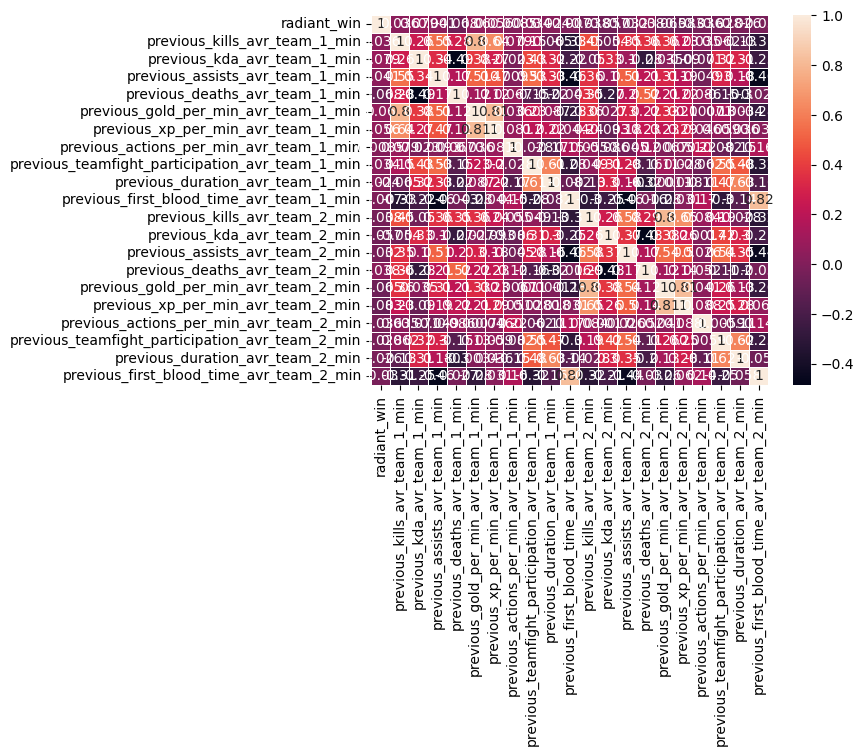

<Figure size 1000x1000 with 0 Axes>

In [ ]:
int_columns = df_team[columns].select_dtypes(include=['int', 'float'])
corr=int_columns.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
corr_matrix = df_team[columns].corr()
corr_matrix

,radiant_win,previous_kills_avr_team_1_min,previous_kda_avr_team_1_min,previous_assists_avr_team_1_min,previous_deaths_avr_team_1_min,previous_gold_per_min_avr_team_1_min,previous_xp_per_min_avr_team_1_min,previous_actions_per_min_avr_team_1_min,previous_teamfight_participation_avr_team_1_min,previous_duration_avr_team_1_min,...,previous_kills_avr_team_2_min,previous_kda_avr_team_2_min,previous_assists_avr_team_2_min,previous_deaths_avr_team_2_min,previous_gold_per_min_avr_team_2_min,previous_xp_per_min_avr_team_2_min,previous_actions_per_min_avr_team_2_min,previous_teamfight_participation_avr_team_2_min,previous_duration_avr_team_2_min,previous_first_blood_time_avr_team_2_min
radiant_win,1.000000,0.035793,0.079377,0.040881,-0.067702,0.059954,0.056378,0.008462,0.034350,0.024464,...,-0.038338,-0.056760,-0.031833,0.038469,-0.064718,-0.082712,-0.035611,-0.028335,-0.026237,-0.029689
previous_kills_avr_team_1_min,0.035793,1.000000,0.261268,0.551324,0.278142,0.795504,0.643993,0.079417,0.149775,-0.064988,...,0.447552,-0.054471,0.349141,0.357414,0.357183,0.231506,0.034736,0.061801,-0.125299,-0.309471
previous_kda_avr_team_1_min,0.079377,0.261268,1.000000,0.337395,-0.485001,0.381336,0.270775,-0.022958,0.429065,0.316429,...,-0.049834,0.326145,0.099794,-0.278051,0.034921,-0.089502,-0.071172,0.319082,0.307867,-0.249348
previous_assists_avr_team_1_min,0.040881,0.551324,0.337395,1.000000,0.174756,0.513310,0.465472,0.009286,0.534982,0.329521,...,0.360935,0.099604,0.511327,0.207509,0.314737,0.190498,-0.048892,0.299154,0.181514,-0.464291
previous_deaths_avr_team_1_min,-0.067702,0.278142,-0.485001,0.174756,1.000000,0.115232,0.124505,0.066526,-0.145932,-0.216844,...,0.351997,-0.267913,0.204984,0.518875,0.212433,0.220803,0.085619,-0.148978,-0.302943,-0.027006
previous_gold_per_min_avr_team_1_min,0.059954,0.795504,0.381336,0.513310,0.115232,1.000000,0.809245,0.036042,0.233125,0.086877,...,0.355828,0.026931,0.299932,0.220308,0.328142,0.213824,-0.000710,0.131094,0.003361,-0.277750
previous_xp_per_min_avr_team_1_min,0.056378,0.643993,0.270775,0.465472,0.124505,0.809245,1.000000,0.080542,0.204945,0.222375,...,0.243311,-0.092948,0.182473,0.232799,0.225063,0.286774,0.046015,0.059238,0.036144,0.030877
previous_actions_per_min_avr_team_1_min,0.008462,0.079417,-0.022958,0.009286,0.066526,0.036042,0.080542,1.000000,-0.027783,-0.165542,...,0.054915,-0.085667,-0.045356,0.115620,0.006731,0.050569,0.216458,-0.081831,-0.151716,0.164311
previous_teamfight_participation_avr_team_1_min,0.034350,0.149775,0.429065,0.534982,-0.145932,0.233125,0.204945,-0.027783,1.000000,0.614599,...,0.048800,0.309959,0.279553,-0.161811,0.113464,0.027847,-0.061624,0.545923,0.479227,-0.324044
previous_duration_avr_team_1_min,0.024464,-0.064988,0.316429,0.329521,-0.216844,0.086877,0.222375,-0.165542,0.614599,1.000000,...,-0.129320,0.304268,0.164887,-0.317600,0.000107,0.018223,-0.110084,0.468632,0.627507,-0.158505


 Поскольку предсказания будут строиться на момент начала матча, необходимо рассмотреть корреляцию с показателями, рассчитанными за предыдущие игры агрегировано по команде. Сильной корреляции с показателем win не наблюдается, возможно зависимость нелинейная. При этом показатели коррелируют между собой: корреляция между kills, gold, xp наблюдается при агрегации как по account_id так и по командам для каждого match_id. Также знак зависимости переменных в зависимости от команды team_1 и team_2 выглядит логичным, поскольку рост показателей team_2 должен снижать вероятность победы для team_1, которую планируется предсказывать

## Работа с датафреймом агрегированным по командам

In [ ]:
df_team.shape

(24131, 182)

In [ ]:
# вывод пропусков
pd.set_option('display.max_rows', None)
missing_values = df_team.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

previous_kills_avr_team_1_mean                      463
previous_kills_avr_team_1_max                       463
previous_kills_avr_team_1_min                       463
previous_hero_kills_avr_team_1_mean                 463
previous_hero_kills_avr_team_1_max                  463
previous_hero_kills_avr_team_1_min                  463
previous_courier_kills_avr_team_1_mean              463
previous_courier_kills_avr_team_1_max               463
previous_courier_kills_avr_team_1_min               463
previous_observer_kills_avr_team_1_mean             463
previous_observer_kills_avr_team_1_max              463
previous_observer_kills_avr_team_1_min              463
previous_kills_per_min_avr_team_1_mean              463
previous_kills_per_min_avr_team_1_max               463
previous_kills_per_min_avr_team_1_min               463
previous_kda_avr_team_1_mean                        463
previous_kda_avr_team_1_max                         463
previous_kda_avr_team_1_min                     

Переменные имеют пропуски из-за формулы расчета, при расчете использовалось скользящее среднее для наблюдений, у которых не было предыдущих данных возвращалось Nan. Уберем эти строки из данных

In [ ]:
df_team_cleaned = df_team.dropna(how='any')

In [ ]:
df_team_cleaned.shape

(23347, 182)

In [ ]:
# В наших данных информация по 23347 матчам
len(df_team_cleaned['match_id'].unique())

23347

In [ ]:
df_team_cleaned.head()

,match_id,previous_kills_avr_team_1_mean,previous_kills_avr_team_1_max,previous_kills_avr_team_1_min,previous_hero_kills_avr_team_1_mean,previous_hero_kills_avr_team_1_max,previous_hero_kills_avr_team_1_min,previous_courier_kills_avr_team_1_mean,previous_courier_kills_avr_team_1_max,previous_courier_kills_avr_team_1_min,...,previous_win_avr_team_2_mean,previous_win_avr_team_2_max,previous_win_avr_team_2_min,previous_duration_avr_team_2_mean,previous_duration_avr_team_2_max,previous_duration_avr_team_2_min,previous_first_blood_time_avr_team_2_mean,previous_first_blood_time_avr_team_2_max,previous_first_blood_time_avr_team_2_min,radiant_win
1,7515660161,5.2,8.0,0.0,5.2,8.0,0.0,1.0,2.0,0.0,...,1.0,1.0,1.0,32.100000,32.100000,32.100000,2.333333,2.333333,2.333333,0
5,7515770778,4.8,8.0,2.0,4.8,8.0,2.0,0.8,2.0,0.0,...,1.0,1.0,1.0,34.266667,34.266667,34.266667,1.400000,1.400000,1.400000,0
6,7515777217,6.2,15.0,0.0,6.2,15.0,0.0,0.4,1.0,0.0,...,1.0,1.0,1.0,37.016667,37.016667,37.016667,0.466667,0.466667,0.466667,0
8,7515803696,4.2,9.0,2.0,4.2,9.0,2.0,0.4,1.0,0.0,...,0.0,0.0,0.0,33.300000,33.300000,33.300000,4.400000,4.400000,4.400000,0
10,7515833211,5.6,7.0,4.0,5.6,7.0,4.0,0.2,1.0,0.0,...,0.0,0.0,0.0,28.450000,28.450000,28.450000,0.183333,0.183333,0.183333,1


In [ ]:
df_team_cleaned[df_team_cleaned['radiant_win'] == 0].shape

(11489, 182)

In [ ]:
df_team_cleaned[df_team_cleaned['radiant_win'] == 1].shape

(11858, 182)

# Пострение базовых моделей

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes

In [ ]:
y = df_team_cleaned['radiant_win']
X = df_team_cleaned.drop(columns=['radiant_win', 'match_id'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
# Стандартизируем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

pred = model.predict(X_test)

pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-Score: {f1_score(y_test, pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, pred_prob)}")

Accuracy: 0.5761858871399508
Precision: 0.5751159507965315
Recall: 0.6064214331277907
F1-Score: 0.5903539639826123
AUC-ROC: 0.6188331957076945


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Обучаем дерево решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Предсказания
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Вывод метрик
print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-Score: {f1_score(y_test, pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, pred_prob)}")

Accuracy: 0.5352821501231395
Precision: 0.5384126984126985
Recall: 0.5409313204337657
F1-Score: 0.5396690708527789
AUC-ROC: 0.5352413288967793


In [ ]:
import xgboost as xgb

# Обучаем XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-Score: {f1_score(y_test, pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, pred_prob)}")

Accuracy: 0.569332905021951
Precision: 0.5699897225077081
Recall: 0.5896236444822454
F1-Score: 0.5796404682274248
AUC-ROC: 0.6066547714206616


Все метрики (accuracy, precision, recall, F1-score и AUC-ROC) имеют значения около 0.53-0.59, что указывает на то, что модель имеет умеренные результаты, близкие к случайному выбору.

## Попробуем построить модели только на колонках, агрегированных по среднему значению

In [ ]:
df_mean = df_team_cleaned.loc[:, df_team_cleaned.columns.str.contains('mean|radiant_win')]

In [ ]:
y = df_mean['radiant_win']
X = df_mean.drop(columns=['radiant_win'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

pred = model.predict(X_test)

pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-Score: {f1_score(y_test, pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, pred_prob)}")

Accuracy: 0.5799336117357319
Precision: 0.583402146985962
Recall: 0.5973367152821814
F1-Score: 0.5902872062663186
AUC-ROC: 0.6213364055637756


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Предсказания
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Вывод метрик
print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-Score: {f1_score(y_test, pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, pred_prob)}")

Accuracy: 0.534211371667202
Precision: 0.5410471881060116
Recall: 0.5307545973367153
F1-Score: 0.5358514724711908
AUC-ROC: 0.534257507001691


In [ ]:
import xgboost as xgb

# Обучаем XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"Precision: {precision_score(y_test, pred)}")
print(f"Recall: {recall_score(y_test, pred)}")
print(f"F1-Score: {f1_score(y_test, pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, pred_prob)}")

Accuracy: 0.5611949887568262
Precision: 0.5659787367104441
Recall: 0.5738744451490171
F1-Score: 0.5698992443324937
AUC-ROC: 0.5933995714216516


# feature engineering

Модели показали не высокое качество на df_team. Необходимо доработать данные, попробуем добавить информацию о игровых персонажах

In [ ]:
df_team_cleaned.head()

,match_id,previous_kills_avr_team_1_mean,previous_kills_avr_team_1_max,previous_kills_avr_team_1_min,previous_hero_kills_avr_team_1_mean,previous_hero_kills_avr_team_1_max,previous_hero_kills_avr_team_1_min,previous_courier_kills_avr_team_1_mean,previous_courier_kills_avr_team_1_max,previous_courier_kills_avr_team_1_min,...,previous_win_avr_team_2_mean,previous_win_avr_team_2_max,previous_win_avr_team_2_min,previous_duration_avr_team_2_mean,previous_duration_avr_team_2_max,previous_duration_avr_team_2_min,previous_first_blood_time_avr_team_2_mean,previous_first_blood_time_avr_team_2_max,previous_first_blood_time_avr_team_2_min,radiant_win
1,7515660161,5.2,8.0,0.0,5.2,8.0,0.0,1.0,2.0,0.0,...,1.0,1.0,1.0,32.100000,32.100000,32.100000,2.333333,2.333333,2.333333,0
5,7515770778,4.8,8.0,2.0,4.8,8.0,2.0,0.8,2.0,0.0,...,1.0,1.0,1.0,34.266667,34.266667,34.266667,1.400000,1.400000,1.400000,0
6,7515777217,6.2,15.0,0.0,6.2,15.0,0.0,0.4,1.0,0.0,...,1.0,1.0,1.0,37.016667,37.016667,37.016667,0.466667,0.466667,0.466667,0
8,7515803696,4.2,9.0,2.0,4.2,9.0,2.0,0.4,1.0,0.0,...,0.0,0.0,0.0,33.300000,33.300000,33.300000,4.400000,4.400000,4.400000,0
10,7515833211,5.6,7.0,4.0,5.6,7.0,4.0,0.2,1.0,0.0,...,0.0,0.0,0.0,28.450000,28.450000,28.450000,0.183333,0.183333,0.183333,1


In [ ]:
df.head()

,match_id,player_slot,account_id,hero_name,kills,hero_kills,courier_kills,observer_kills,kills_per_min,kda,...,previous_teamfight_participation_avr,previous_camps_stacked_avr,previous_creeps_stacked_avr,previous_stuns_avr,previous_sentry_uses_avr,previous_roshan_kills_avr,previous_tower_kills_avr,previous_win_avr,previous_duration_avr,previous_first_blood_time_avr
0,7515635423,0,177062248.0,Earth Spirit,8.0,8.0,0.0,0.0,0.249221,3.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7515635423,1,164322994.0,Morphling,11.0,11.0,0.0,0.0,0.342679,4.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7515635423,2,294245092.0,Shadow Demon,7.0,5.0,0.0,1.0,0.218069,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7515635423,3,154357932.0,Treant Protector,11.0,11.0,0.0,4.0,0.342679,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7515635423,4,279486190.0,Shadow Fiend,5.0,5.0,0.0,0.0,0.155763,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Список всех персонажей в матче в разрезе команд
df.groupby(['match_id', 'isRadiant'])['hero_name'].apply(list).head()

match_id    isRadiant
7515635423  False        [Spirit Breaker, Queen of Pain, Disruptor, Lun...
            True         [Earth Spirit, Morphling, Shadow Demon, Treant...
7515660161  False        [Earth Spirit, Hoodwink, Troll Warlord, Storm ...
            True         [Dazzle, Dark Willow, Timbersaw, Shadow Fiend,...
7515737711  False        [Sand King, Primal Beast, Elder Titan, Sniper,...
Name: hero_name, dtype: object